# Obesity Levels

## Dataset Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Data Libraries

Gender: Feature, Categorical, "Gender"  
Age : Feature, Continuous, "Age"  
Height: Feature, Continuous, in m  
Weight: Feature Continuous, in kg  
family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "  
FAVC : Feature, Binary, " Do you eat high caloric food frequently? "  
FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "  
NCP : Feature, Continuous, " How many main meals do you have daily? "  
CAEC : Feature, Categorical, " Do you eat any food between meals? "  
SMOKE : Feature, Binary, " Do you smoke? "  
CH2O: Feature, Continuous, " How much water do you drink daily? "  
SCC: Feature, Binary, " Do you monitor the calories you eat daily? "  
FAF: Feature, Continuous, " How often do you have physical activity? "  
TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "  
CALC : Feature, Categorical, " How often do you drink alcohol? "  
MTRANS : Feature, Categorical, " Which transportation do you usually use? "  
NObeyesdad : Target, Categorical, "Obesity level"  

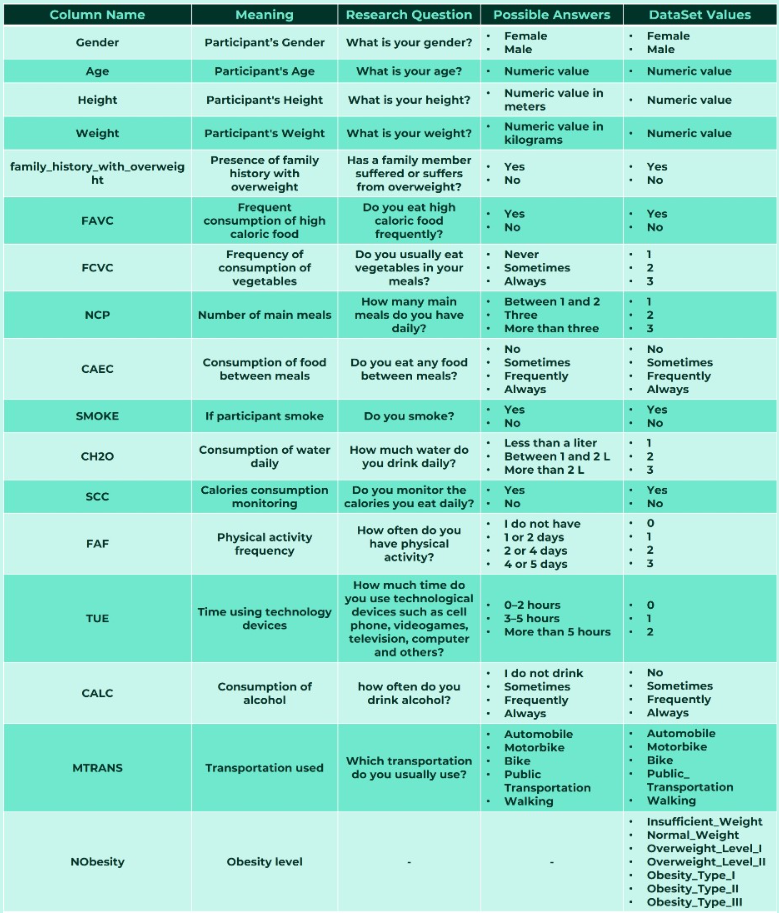

# Exploratory Data Analysis

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Import DataFrame
obes = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
#First 5 rows
print("Here are the first 5 rows of the DataFrame:\n")
obes.head()

Here are the first 5 rows of the DataFrame:



,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#Last 5 rows
print("Here are the last 5 rows of the DataFrame:\n")
obes.tail()

Here are the last 5 rows of the DataFrame:



,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#Numbers of rows and colomns (rows, columns)
obes.shape

(2111, 17)

In [6]:
#Columns name
print("Here are the columns' name of the DataFrame:")
obes.columns

Here are the columns' name of the DataFrame:


Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
obes.index

RangeIndex(start=0, stop=2111, step=1)

In [15]:
#Data description
obes.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [17]:
#Missing values
obes.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [21]:
#Data types
obes.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

# Data Visualisation

## Data Visualisation using Histogram for Age, Height and Weight

In [25]:
# Define Scott's Normal Reference Rule function (to find best bins to visualize data)
def scotts_bins(obes):
    n = len(obes) #amount of DataFrame
    bin_width = 3.5 * obes.std() / n**(1/3) #Calculate the bin's width
    return int((obes.max() - obes.min()) / bin_width) #Calculate the number of bins

# Column data to create histogram
hist_columns = ["Age", "Height", "Weight"]
hist_colors = ["orange", "skyblue", "pink"]

# Define number of bins for the age, height and weight columns 
for i in range(len(hist_columns)):
    columns = hist_columns[i]
    colors = hist_colors[i]
    
    num_bins = scotts_bins(obes[columns])
    print(f"Number of bins for {columns}: {num_bins}")

Number of bins for Age: 27
Number of bins for Height: 20
Number of bins for Weight: 18


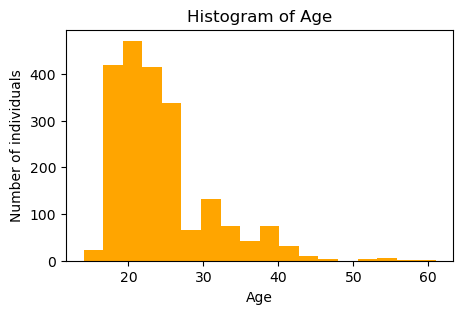

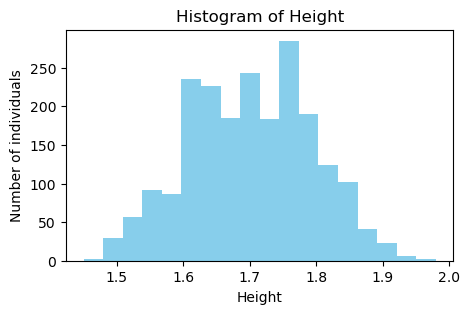

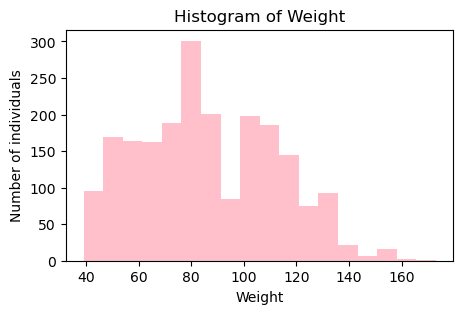

In [27]:
# Create historgram for age, height and weight using For Loops
for i in range(len(hist_columns)):
    columns = hist_columns[i]
    colors = hist_colors[i] 
    
    #Plot the histogram
    plt.figure(figsize=(5,3)) #Size of the figure
    plt.hist(obes[columns], bins=num_bins, color=colors)

    #Set titles
    plt.title(f"Histogram of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Number of individuals")
    plt.tight_layout
    plt.show
    

*Histogram of Age*
- This histogram shows Skewed Distribution where the age distribution is right-skewed
- This incicates a younger population in the dataset where the majority of individuals concentrated between the ages of 15 and 30
- There are also outliers in Older Age Groups; fewer individuals in the age groups above 40

*Histogram of Height*
- This histogram of height distribution shows Normal Distribution
- This indicates that most individuals' heights clustering around 1.65 to 1.75 meters and it is the typical height range for the population in the dataset

*Histogram of Weight*
- This histogram shows Bimodal Distribution, with two prominent peaks around 80-90 kg and 100-110 kg
- This incicates distinct subgroups within the population

## Age Category

In [33]:
# Min age
obes["Age"].min()

14.0

In [35]:
# Max age
obes["Age"].max()

61.0

In [39]:
# Categorize Age
# Define age category 
def categorize_age(age):
    if age <= 16: 
        return "Teens"
    elif age <= 30:
        return "Young Adults"
    elif age <= 45:
        return "Middle-aged Adults"
    else:
        return "Old-aged Adults"

In [41]:
# Apply to age column
obes["age_category"] = obes["Age"].apply(categorize_age)
print(obes)

            Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_with_overweight       FAF       TU

In [43]:
# Arrange the order correctly
age_categories_order = ["Teens", "Young Adults", "Middle-aged Adults", "Old-aged Adults"]
age_categories = pd.Categorical(obes["age_category"], categories=age_categories_order, ordered=True)

#Count the number for Age
age_categories_ordered = obes['age_category'].value_counts().reindex(age_categories_order)  
print(age_categories_ordered) 

age_category
Teens                   11
Young Adults          1744
Middle-aged Adults     342
Old-aged Adults         14
Name: count, dtype: int64


In [45]:
# Define values for Bar chart of the Age D
age_category_values = age_categories_ordered.values
age_category_counts = age_categories_ordered.index

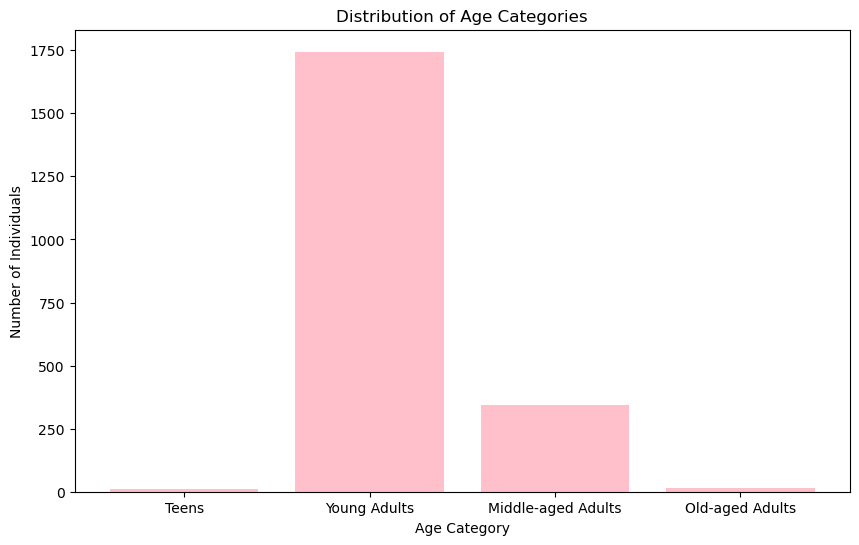

In [47]:
#Plot Bar Chart
plt.figure(figsize=(10,6))
plt.bar(age_category_counts, age_category_values, color="pink")
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Number of Individuals')
plt.show()

**Young Adults:**
- The highest number of individuals, making up the majority of the dataset.
  
**Middle-aged Adults:**
- The second-largest group, but significantly smaller than Young Adults.

**Teens and Old-aged Adults:**
- Both are minimally represented, indicating a very small presence in the dataset.

## BMI Category

In [51]:
#Calculate BMI
obes["bmi"] = obes["Weight"] / (obes["Height"]**2)
print(obes)

            Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_with_overweight       FAF       TU

In [53]:
#Define function to categorize BMI as standard BMI Category
def bmi_category(bmi): 
    if bmi < 18.5: 
        return "Insufficient_Weight"
    elif bmi < 25: 
        return "Normal_Weight"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 35: 
        return "Obesity_Type_I"
    elif bmi < 40: 
        return "Obesity_Type_II"
    else: 
        return "Obesity_Type_III"

In [57]:
#Add bmi_category as new column
obes["BMI_category"] = obes["bmi"].apply(bmi_category)

In [59]:
obes.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,age_category,bmi,BMI_category
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,Young Adults,24.386526,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Young Adults,24.238227,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,Young Adults,23.765432,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I,Young Adults,26.851852,Overweight
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Young Adults,28.342381,Overweight


In [61]:
#Comparisan first 10 rows of NObeyesdad and BMI_category columns
obes[["NObeyesdad", "BMI_category"]].head(10)

,NObeyesdad,BMI_category
0,Normal_Weight,Normal_Weight
1,Normal_Weight,Normal_Weight
2,Normal_Weight,Normal_Weight
3,Overweight_Level_I,Overweight
4,Overweight_Level_II,Overweight
5,Normal_Weight,Normal_Weight
6,Normal_Weight,Normal_Weight
7,Normal_Weight,Normal_Weight
8,Normal_Weight,Normal_Weight
9,Normal_Weight,Normal_Weight


In [63]:
#Comparisan last 10 rows of NObeyesdad and BMI_category columns
obes[["NObeyesdad", "BMI_category"]].tail(10)

,NObeyesdad,BMI_category
2101,Obesity_Type_III,Obesity_Type_III
2102,Obesity_Type_III,Obesity_Type_III
2103,Obesity_Type_III,Obesity_Type_III
2104,Obesity_Type_III,Obesity_Type_III
2105,Obesity_Type_III,Obesity_Type_III
2106,Obesity_Type_III,Obesity_Type_III
2107,Obesity_Type_III,Obesity_Type_III
2108,Obesity_Type_III,Obesity_Type_III
2109,Obesity_Type_III,Obesity_Type_III
2110,Obesity_Type_III,Obesity_Type_III


In [65]:
# Check if there is any mismatch between the old and new BMI category
obes["Category_Match"] = obes["BMI_category"] == obes['NObeyesdad']
mismatches = obes[obes["Category_Match"] == False]
print(mismatches[['bmi', 'NObeyesdad', 'BMI_category']])

            bmi           NObeyesdad     BMI_category
3     26.851852   Overweight_Level_I       Overweight
4     28.342381  Overweight_Level_II       Overweight
11    27.041644  Overweight_Level_II       Overweight
16    27.383285  Overweight_Level_II       Overweight
18    28.042817  Overweight_Level_II       Overweight
...         ...                  ...              ...
2042  36.856473     Obesity_Type_III  Obesity_Type_II
2044  39.419841     Obesity_Type_III  Obesity_Type_II
2068  39.733748     Obesity_Type_III  Obesity_Type_II
2096  39.646982     Obesity_Type_III  Obesity_Type_II
2097  39.700163     Obesity_Type_III  Obesity_Type_II

[666 rows x 3 columns]


In [67]:
# Amount of mismatches
mis_amount = len(mismatches)
print(f"Mismatches: {mis_amount}\n")

# List the unique mismatched pairs
unique_mismatches = mismatches[['NObeyesdad', 'BMI_category']].drop_duplicates()
print("Unique Mismatched Values:\n")
print(unique_mismatches.to_string(index=False))

Mismatches: 666

Unique Mismatched Values:

         NObeyesdad        BMI_category
 Overweight_Level_I          Overweight
Overweight_Level_II          Overweight
      Normal_Weight Insufficient_Weight
   Obesity_Type_III     Obesity_Type_II
Insufficient_Weight       Normal_Weight
 Overweight_Level_I       Normal_Weight
Overweight_Level_II      Obesity_Type_I
     Obesity_Type_I     Obesity_Type_II
     Obesity_Type_I          Overweight
    Obesity_Type_II      Obesity_Type_I


### Plot Pie Chart to compare old (NObeyesdad) and new (BMI_category) BMI Category 

In [70]:
#Arrange order NObeyesdad
o_bmi_cat_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
obes["NObeyesdad"] = pd.Categorical(obes["NObeyesdad"], categories=o_bmi_cat_order, ordered=True)

#Arrange order BMI Category
n_bmi_cat_order = ["Insufficient_Weight", "Normal_Weight", "Overweight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
obes["BMI_category"] = pd.Categorical(obes["BMI_category"], categories=n_bmi_cat_order, ordered=True)

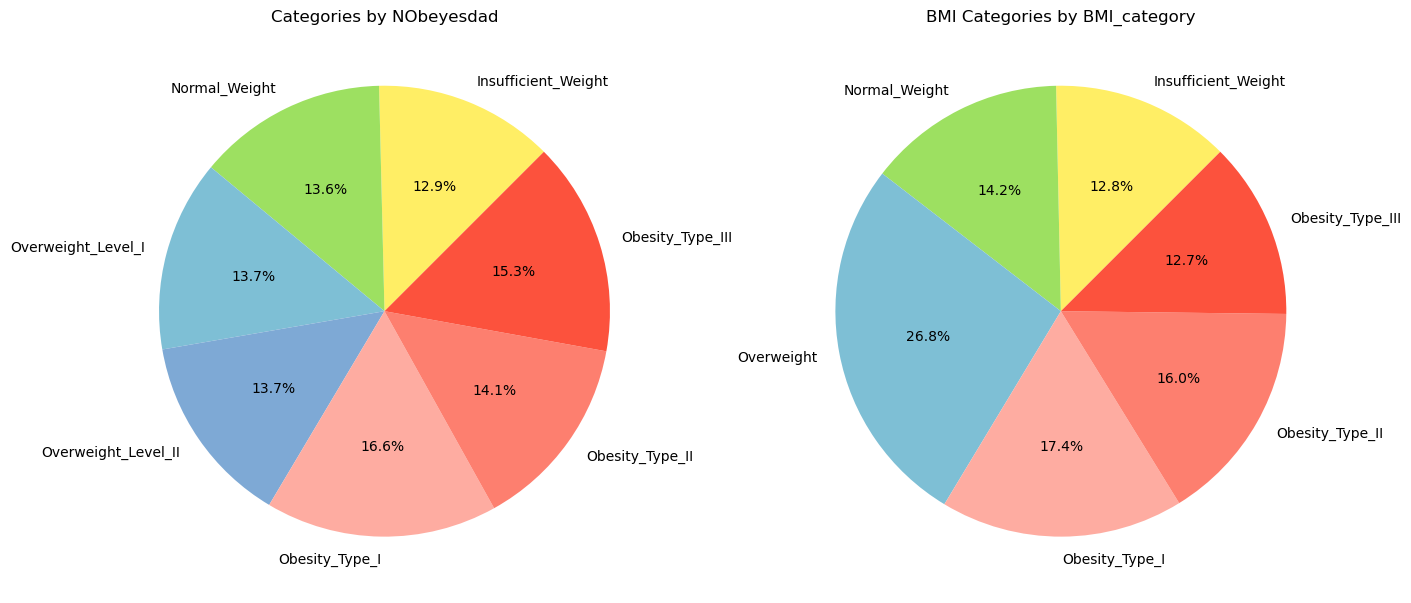

In [72]:
#Create Pie Chart
plot_bmi_cat = ["NObeyesdad", "BMI_category"]

#Customize color for Pie Chart
o_pie_colors = ["#ffee65", "#9de061", "#7ebfd5", "#7ea9d5", "#feaca1", "#fd7f6f", "#fc523d"]
n_pie_colors = ["#ffee65", "#9de061", "#7ebfd5", "#feaca1", "#fd7f6f", "#fc523d"]

# Create subplots for side-by-side pie charts
fig, axs = plt.subplots(1, 2, figsize=(16, 8)) #1 row, 2 columns

# Old BMI Category Pie Chart (NObeyesdad)
counts_bmi_cat = obes[plot_bmi_cat[0]].value_counts()
counts_bmi_cat = counts_bmi_cat.reindex(o_bmi_cat_order)  # Make sure the BMI category order is correct
axs[0].pie(counts_bmi_cat, labels=counts_bmi_cat.index, autopct="%1.1f%%", startangle=45, colors=o_pie_colors)
axs[0].set_title(f"Categories by {plot_bmi_cat[0]}")

# New BMI Category Pie Chart (BMI_category)
counts_bmi_cat = obes[plot_bmi_cat[1]].value_counts()
counts_bmi_cat = counts_bmi_cat.reindex(n_bmi_cat_order)  # Make sure the BMI category order is correct
axs[1].pie(counts_bmi_cat, labels=counts_bmi_cat.index, autopct="%1.1f%%", startangle=45, colors=n_pie_colors)
axs[1].set_title(f"BMI Categories by {plot_bmi_cat[1]}")

#Show layout
plt.show()

**Comparison of Categories by NObeyesdad and BMI_category:**

1. **Category Differences:**  
- The NObeyesdad Pie Chart breaks down the "Overweight" category into two distinct levels: Overweight_Level_I and Overweight_Level_II, whereas the BMI_category Pie Chart groups all overweight individuals into a single "Overweight" category.  
- Both charts share categories like Insufficient_Weight, Normal_Weight, Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III.

2. **Difference of Classification on Distribution:**  
- BMI_category combines all overweight individuals into one category, which results in a higher percentage for "Overweight" compared to the more granular breakdown in NObeyesdad.

3. **Highest Percentage:**  
- In the NObeyesdad chart, the category with the highest percentage is Obesity_Type_I. In contrast, the BMI_category chart shows "Overweight" as the largest category, likely because it combines the two overweight levels into one, making it more dominant.

4. **Lowest Percentage:**  
- In the NObeyesdad chart, the category with the lowest percentage is Insufficient_Weight. Meanwhile, in the BMI_category chart, Obesity_Type_III has the lowest representation.

## Relationship between BMI and Influenced Factors

In [76]:
#DataFrame types
obes.dtypes

Age                                float64
Gender                              object
Height                             float64
Weight                             float64
CALC                                object
FAVC                                object
FCVC                               float64
NCP                                float64
SCC                                 object
SMOKE                               object
CH2O                               float64
family_history_with_overweight      object
FAF                                float64
TUE                                float64
CAEC                                object
MTRANS                              object
NObeyesdad                        category
age_category                        object
bmi                                float64
BMI_category                      category
Category_Match                        bool
dtype: object

### Categorize the column into data categories

In [79]:
# Define function to categorize the columns
def categorize_columns(obes):
    categorical = []
    binary = []
    continuous = []
    
    for column in obes.columns:
        unique_val = obes[column].nunique() #number of unique values
        if obes[column].dtype == "object" or unique_val < 10:
            if unique_val == 2:
                binary.append(column)
            else:
                categorical.append(column)
        else:
            continuous.append(column)
    
    return categorical, binary, continuous

# Apply the function to the obesity level column
categorical_columns, binary_columns, continuous_columns = categorize_columns(obes)

# Print the categorized columns
print("Binary Columns:", binary_columns)
print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Binary Columns: ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'Category_Match']
Categorical Columns: ['CALC', 'CAEC', 'MTRANS', 'NObeyesdad', 'age_category', 'BMI_category']
Continuous Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'bmi']


### BMI vs Influenced Factors Visualisation

In [82]:
#Dictionary to change label for plotting
label = {
    "Gender": "Gender",
    "family_history_with_overweight": "Family History",
    "FAVC": "High Caloric Food",
    "FCVC": "Vegetables Intake",
    "NCP": "Main Meals",
    "CAEC": "Food Intake between Meals",
    "SMOKE": "Smoke",
    "CH2O": "Water Intake",
    "SCC": "Calories Monitory",
    "FAF": "Physical Activity",
    "TUE": "Devices Usage",
    "CALC": "Alcohol Intake",
    "MTRANS": "Transportation"   
}

for i in label:
    print(f"The new label for {i} is: {label[i]}")

The new label for Gender is: Gender
The new label for family_history_with_overweight is: Family History
The new label for FAVC is: High Caloric Food
The new label for FCVC is: Vegetables Intake
The new label for NCP is: Main Meals
The new label for CAEC is: Food Intake between Meals
The new label for SMOKE is: Smoke
The new label for CH2O is: Water Intake
The new label for SCC is: Calories Monitory
The new label for FAF is: Physical Activity
The new label for TUE is: Devices Usage
The new label for CALC is: Alcohol Intake
The new label for MTRANS is: Transportation


#### Binary Features

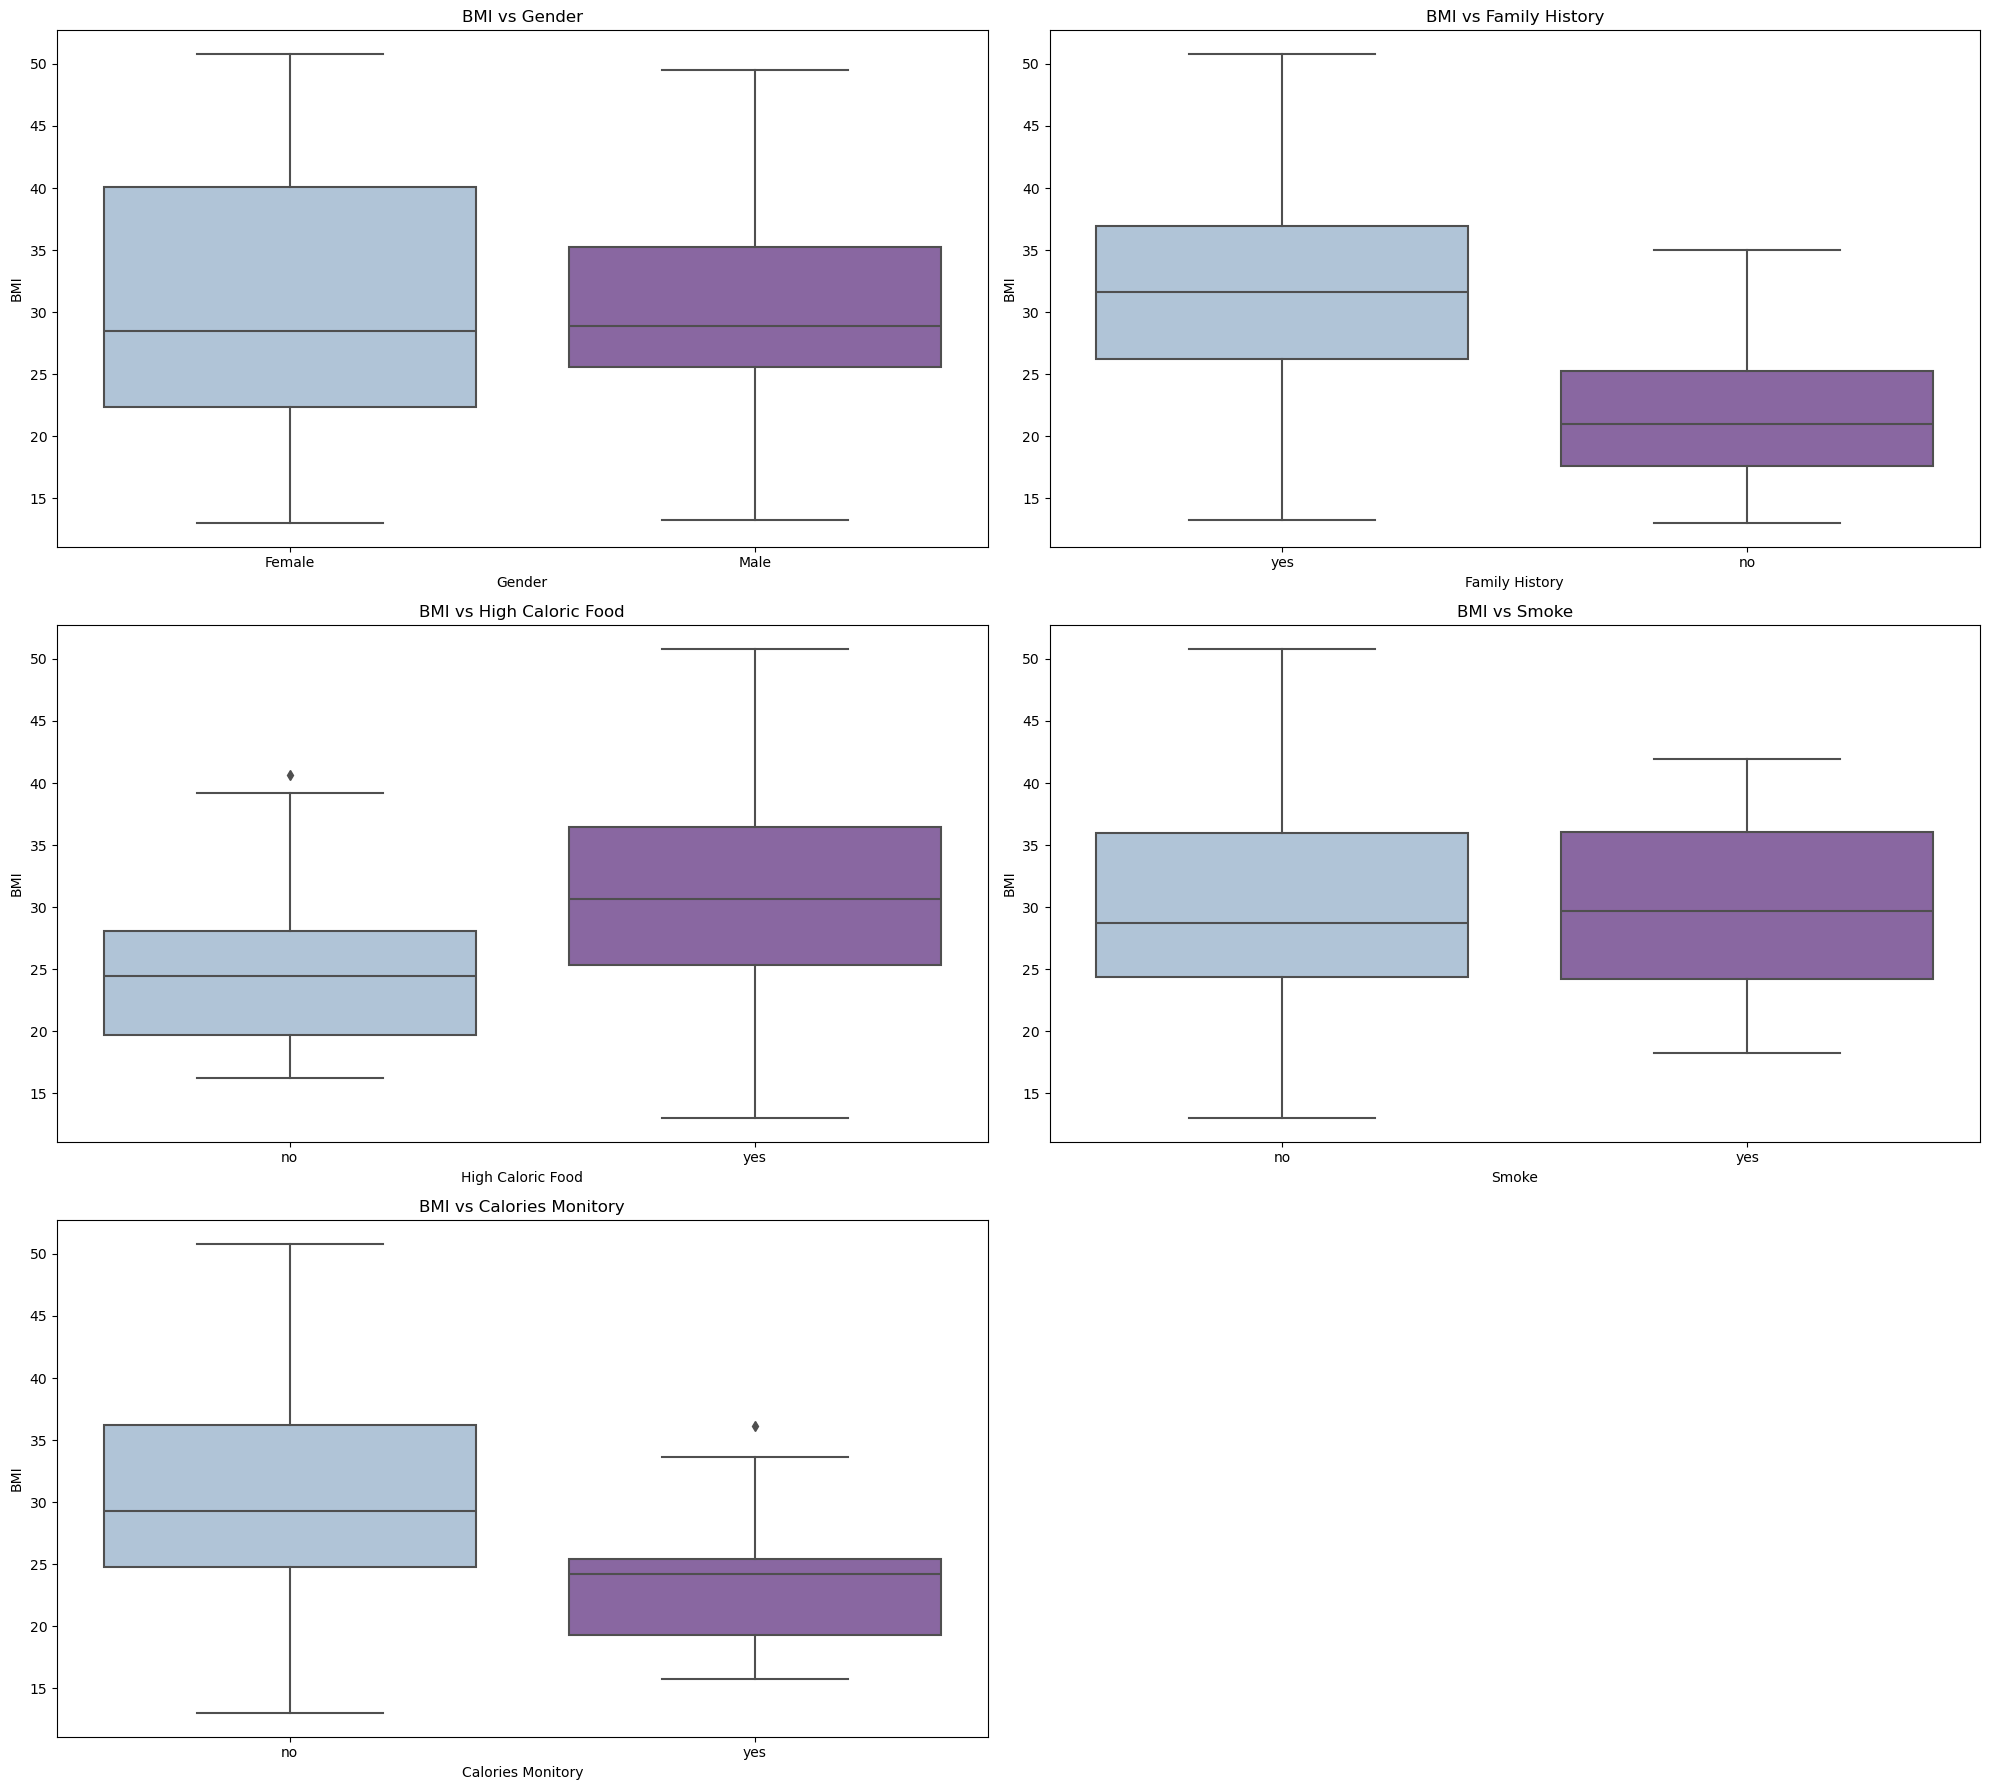

In [84]:
# List of features to visualize
binary = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

# Determine the number of rows needed
nrows = int(np.ceil(len(binary) / 2))

# Create subplots - 2 columns
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 6 * nrows)) 

# If there's only one row, axs might not be a list, so we ensure it's flattened
if nrows == 1:
    axs = axs.reshape(-1)
else:
    axs = axs.flatten()

# Remove any empty subplots if the number of features is odd
if len(binary) % 2 != 0:
    fig.delaxes(axs[-1])
    
#Set axs is as list
if len(binary) == 1:
    axs = [axs]
    
#initial a counter for subplots
c = 0

# Box plots for binary features
for feature in binary:
    sns.boxplot(x=feature, y='bmi', data=obes, ax=axs[c], palette="BuPu")  # Change color with palette
    axs[c].set_title(f"BMI vs {label[feature]}")
    axs[c].set_xlabel(label[feature])
    axs[c].set_ylabel("BMI")

    c += 1 #Counter increment

#Show layout 
plt.tight_layout()
plt.show()    

1. BMI vs Gender:
- The box plot shows that females tend to have a slightly higher median BMI compared to males.
- Both BMI for male and female still in the same range but the interquartile range (IQR) for females is wider, indicating more variation in BMI among females than males
  
2. BMI vs Family History:
- Individuals with a family history of overweight or obesity have a higher median BMI and a broader range compared to those without such a history.
- This suggests that family history may be a significant factor influencing BMI, with those having a family history being more likely to have higher BMIs.
  
3. BMI vs High Caloric Food Consumption (FAVC):
- Individuals who consume high-caloric food regularly have a higher median BMI compared to those who do not.
- The BMI distribution for those who consume high-caloric food is also less varied, indicating that high-caloric food consumption is associated with a consistently higher BMI.
  
4. BMI Distribution by Smoking Status (SMOKE):
- The BMI distribution for smokers and non-smokers appears similar, with both groups having nearly identical medians and ranges.
- This suggests that smoking status might not have a significant impact on BMI within this dataset.
  
5. BMI Distribution by Caloric Monitoring (SCC):
- Individuals who monitor their caloric intake tend to have a lower median BMI, with a tighter range, compared to those who do not monitor their calories.
- This indicates that caloric monitoring might be effective in maintaining a lower and more consistent BMI.

#### Categorical Feature

In [87]:
# List of categorical features to visualize
categorical = ["CAEC", "CALC", "MTRANS"]

# Define count plots for categorical features
def plot_categorical(categorical):
    for feature in categorical:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue='BMI_category', data=obes, palette=n_pie_colors)
        plt.title(f'BMI vs {label.get(feature, feature)}')
        plt.xlabel(label[feature])
        plt.show()

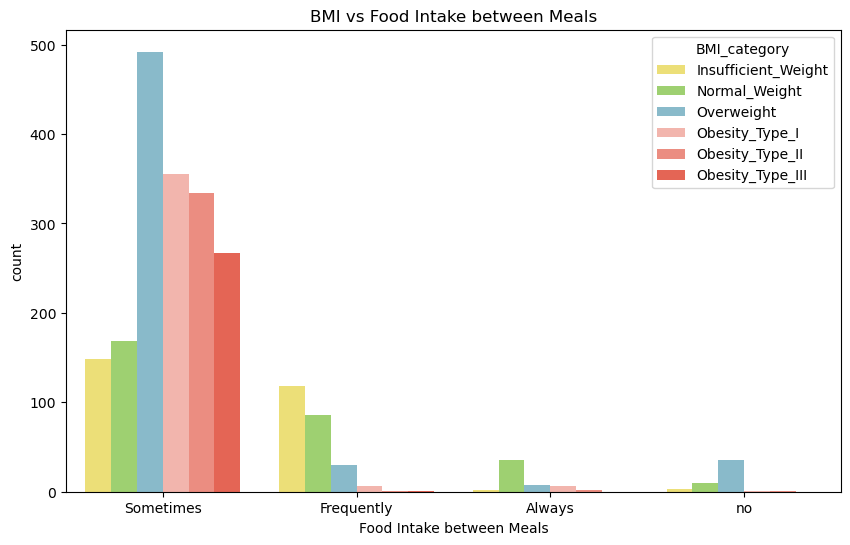

In [89]:
plot_categorical(categorical=["CAEC"])

- People who eat between meals "Sometimes" are the most common, especially in the "Overweight" and "Obesity" categories
- Very few people either always snack or never snack between meals, regardless of their BMI category
- The plot suggests that those who snack sometimes are more likely to be overweight or obese compared to those who snack more or less often

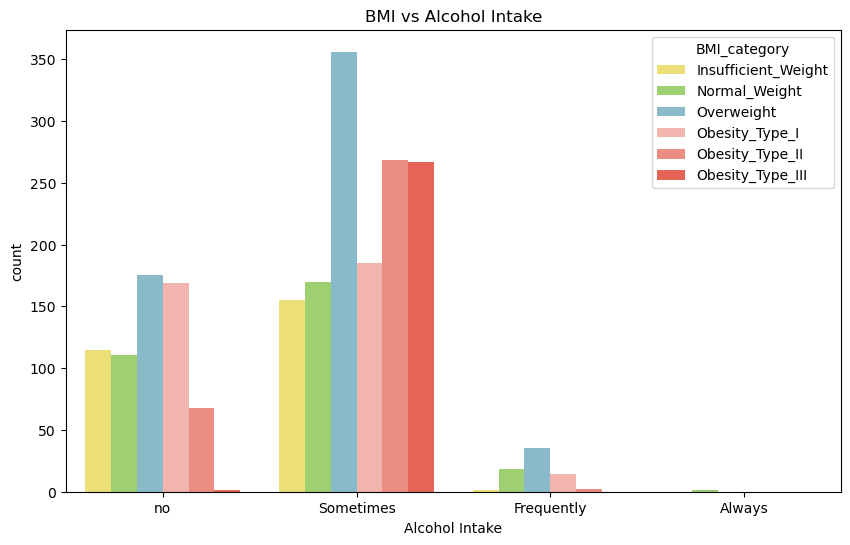

In [92]:
plot_categorical(categorical=["CALC"])

From this plot:  
- The majority of people, especially those who are overweight or obese, report drinking alcohol "Sometimes." This group has the highest counts in these BMI categories.
- A significant number of people, particularly those with normal weight and overweight, report not drinking alcohol at all.
- Very few people drink alcohol "Frequently" or "Always," regardless of their BMI category.

People who drink alcohol occasionally ("Sometimes") are more likely to be in the overweight or obese categories. Those who don’t drink at all also show a mix of normal weight and overweight, but in smaller numbers.

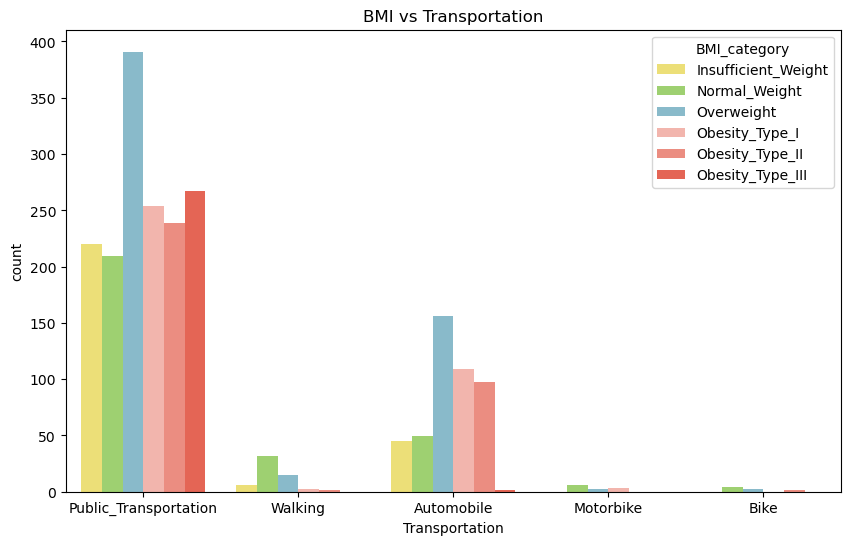

In [95]:
plot_categorical(categorical=["MTRANS"])

- Public Transportation has the highest counts across these BMI categories. The majority of people, especially those who are overweight or obese, use public transportation

- Automobile Users is the second highest transportation used by the people, and it shows a significant number of people who are overweight or obese use automobiles

- Very few people walk or bike as their main mode of transportation, and those who do tend to be in the lower BMI categories (normal weight or insufficient weight)

- Motorbike usage is minimal across all BMI categories

- Most overweight and obese individuals rely on public transportation or automobiles, while walking and biking are associated with lower BMI categories.

#### Continous Features 

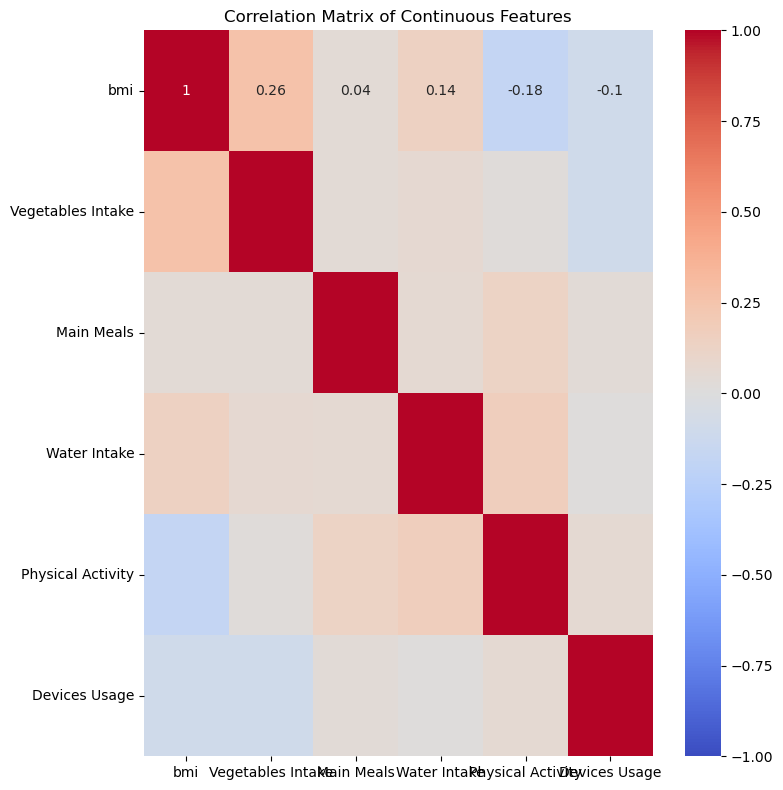

In [98]:
# Select continuous features
continuous_features = ['bmi', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Compute the correlation matrix
correlation_matrix = obes[continuous_features].corr()

labels = [label.get(feature, feature) for feature in continuous_features]

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=0)
plt.title('Correlation Matrix of Continuous Features')
plt.tight_layout()
plt.show()

This heatmap shows the correlation between BMI and lifestyle factors:  

1. **BMI and Vegetables Intake**  
There is a moderate positive correlation (0.26) between BMI and vegetable intake. This suggests that as people consume more vegetables, their BMI might slightly increase.

2. **BMI and Physical Activity**  
A weak negative correlation (-0.18) is observed between BMI and physical activity. This indicates that higher physical activity is slightly associated with lower BMI.

3. **BMI and Water Intake**
There is a very weak positive correlation (0.14) between BMI and water intake, implying a minimal relationship.

4. **BMI and Amount of Main Meals Daily**  
The correlation between BMI and the number of main meals is very low (0.04), indicating almost no relationship.

5. **BMI and Technological Device Usage**
There is a weak negative correlation (-0.10) between BMI and the use of technological devices, suggesting that more time spent using technology is slightly associated with lower BMI.

## Conclusion

The analysis of the dataset reveals that BMI is influenced by various lifestyle factors, but the relationships are generally weak. There is a slight positive correlation between BMI and vegetable intake, and a small negative correlation between BMI and physical activity, indicating that these factors may play a role in BMI but are not strong determinants on their own. Other factors like water intake, the number of meals, and transportation methods also show minimal impact on BMI. Overall, BMI appears to be affected by a combination of multiple factors, with no single factor having a dominant influence.